# The Best Pittsburgh Neighborhood

## Introduction
Our project takes a look at Pittsburgh's neighborhoods from a pedestrian friendliness or "walkability" perspective. Other alternatives we initially explored included safety and health and we found useful datasets for both, but we eventually decided that "walkability" would be a more unique metric. We decided on this metric through a combination of considering the types of data that might reflect "walkability" and looking through the Western Pennsylvania Regional Data Center (WPRDC) database to see what datasets fit well. In the end, we decided on a metric that views the question from a variety of different angles in terms of saftey and convenience including the sidewalk to street ratio, the average length of stairs, the average daily car traffic, and the percentage of cars driving over the speeding limit. 

## The Metric
Our final metric combines the following individual metrics to provide an overall ranking of the best neighborhood in Pittsburgh. Each of these is pulled from our individual notebooks in the form of a dataframe containing a neighborhood column with a corrosponding metric column sorted with the best neighborhood ranked highest.

* Sidewalk-to-Street Ratio — the ratio of the total length of sidewalks and the total length of streets in the neighborhood. The ratio is pulled from the Sidewalk to Street "Walkability" Ratio dataset. A ratio of 2 means there is a sidewalk on both sides of a street, so the higher the ratio, the better the neighborhood is for walking.  While many highways, alleys, and trails were pre-removed from the data set, some pedestrian walkways were left in allowing for a ratio higher than 2. We chose to include this metric because sidewalks are essential to having a "walkable" neighborhood since walking directly on the street poses safety risks. 

In [1]:
import pandas as pd

%store -r sorted_ratios
sorted_ratios.head()

,neighborhood,Ratios
0,Bedford Dwellings,6.644908
1,Allegheny Center,3.227465
2,Terrace Village,2.732608
3,Northview Heights,2.712593
4,North Oakland,2.196612


* Average Stairs per Staircase — this metric looks at how many steps each staircase in the neighborhood contains on average. Neighborhoods which contain more steps on average would be harder to get around on foot so the lower the number, the higher the neighborhood ranks. This metric was pulled from the City of Pittsburgh Steps dataset.

In [2]:
%store -r final_df
final_df = final_df.reset_index(level=0)
final_df = final_df.drop(columns="index")
final_df.head()

,neighborhood,total_stairs/counts
0,Allegheny West,7.666667
1,Mount Oliver Borough,9.000000
2,Esplen,16.000000
3,North Oakland,18.000000
4,Allegheny Center,23.333333


* Average Daily Car Traffic — measured in number of cars. This is pretty straight forward: the more cars, the greater the risk of accidents. This metric was pulled from the City of Pittsburgh Traffic Counts dataset. The lower the number, the better the neighborhood ranks. 

In [3]:
%store -r df_traffic
df_traffic = df_traffic.reset_index(level=0)
df_traffic.rename(columns = {'index':'neighborhood'}, inplace = True)
df_traffic.head()

,neighborhood,Traffic Count
0,South Side Flats,115.0
1,Lincoln Place,126.0
2,Lincoln-Lemington-Belmar,195.0
3,Fineview,419.0
4,Allegheny West,477.0


* Percent Over Limit — this is the average percentage of cars that drive over the speed limit in the neighborhood with the rationale that speeding cars pose greater risks to pedestrians so the lower the percentage, the better the neighborhood ranks. This was also pulled from the City of Pittsburgh Traffic Counts dataset. 

In [4]:
%store -r df_percents
df_percents = df_percents.reset_index(level=0)
df_percents.rename(columns = {'index':'neighborhood'}, inplace = True)
df_percents.head()
# print(df_percents.loc[df_percents['neighborhood'] == 'Bedford Dwellings'])

,neighborhood,Percent Over Limit
0,South Side Flats,3.000000
1,Central Business District,6.000000
2,Allegheny West,11.000000
3,Lincoln Place,14.000000
4,Bluff,14.666667


## Remove neighborhoods that aren't found in all data sets since we do not want to exclude any individual metric from the overall metric:

In [5]:
difference_ratios = []
difference_steps = []
for ((sw_i, sw_row), (step_i, step_row)) in zip(sorted_ratios.iterrows(), final_df.iterrows()):
    if not sw_row['neighborhood'] in final_df.values:
        difference_ratios.append(sw_row['neighborhood'])
    if not step_row['neighborhood'] in sorted_ratios.values:
        difference_steps.append(step_row['neighborhood'])

print("The following list contains neighborhoods that can be found in sidewalk ratios but not in steps:")
print(difference_ratios)
print()

print("The following list contains neighborhoods that can be found in steps but not in sidewalk ratios:")
print(difference_steps)

The following list contains neighborhoods that can be found in sidewalk ratios but not in steps:
['Northview Heights', 'Friendship', 'Arlington Heights', 'Homewood South', 'Homewood West', 'Swisshelm Park', 'Fairywood', 'Chateau']

The following list contains neighborhoods that can be found in steps but not in sidewalk ratios:
[]


#### Remove all neighborhoods from sidewalk ratios that can't be found in one of the other other data frames:

In [6]:
def num_entries_sw():
    return len(sorted_ratios.index)

print("Orginal number of entries in sidewalk ratios:", num_entries_sw())

sorted_ratios = sorted_ratios[sorted_ratios.neighborhood.isin(final_df.neighborhood)];
print("After removing entries not in steps:", num_entries_sw())

sorted_ratios = sorted_ratios[sorted_ratios.neighborhood.isin(df_traffic.neighborhood)];
print("After removing entries not in average daily traffic counts:", num_entries_sw())

sorted_ratios = sorted_ratios[sorted_ratios.neighborhood.isin(df_percents.neighborhood)];
print("After removing entries not in percent over limit:", num_entries_sw())

Orginal number of entries in sidewalk ratios: 91
After removing entries not in steps: 80
After removing entries not in average daily traffic counts: 60
After removing entries not in percent over limit: 58


#### Reset indices for sidewalk ratios:

In [7]:
sorted_ratios = sorted_ratios.reset_index(level=0)
sorted_ratios = sorted_ratios.drop(columns="index")
sorted_ratios.head()

,neighborhood,Ratios
0,Allegheny Center,3.227465
1,North Oakland,2.196612
2,North Shore,2.174160
3,Point Breeze North,2.064611
4,Squirrel Hill North,2.024627


#### Reduce the other data frames similarly, but this time we only need to check against the updated sidewalk ratios data frame:

* Steps:

In [8]:
final_df = final_df[final_df.neighborhood.isin(sorted_ratios.neighborhood)];
final_df = final_df.reset_index(level=0)
final_df = final_df.drop(columns="index")
final_df.head()

,neighborhood,total_stairs/counts
0,Allegheny West,7.666667
1,North Oakland,18.000000
2,Allegheny Center,23.333333
3,Shadyside,25.000000
4,St. Clair,26.500000


* Average Daily Traffic Counts:

In [9]:
df_traffic = df_traffic[df_traffic.neighborhood.isin(sorted_ratios.neighborhood)];
df_traffic = df_traffic.reset_index(level=0)
df_traffic = df_traffic.drop(columns="index")
df_traffic.head()

,neighborhood,Traffic Count
0,South Side Flats,115.0
1,Lincoln Place,126.0
2,Lincoln-Lemington-Belmar,195.0
3,Fineview,419.0
4,Allegheny West,477.0


* Percent Over Limit: 

In [10]:
df_percent = df_traffic[df_traffic.neighborhood.isin(sorted_ratios.neighborhood)];
df_traffic = df_traffic.reset_index(level=0)
df_traffic = df_traffic.drop(columns="index")
df_traffic.head()

,neighborhood,Traffic Count
0,South Side Flats,115.0
1,Lincoln Place,126.0
2,Lincoln-Lemington-Belmar,195.0
3,Fineview,419.0
4,Allegheny West,477.0


## Combining Metrics into an Overall metric
Since all of these metrics are important for "walkability", the way we chose to combine them to get an overall ranking is to add up each neighborhood's rank for each metric. The lower the resulting sum is for a neighborhood, the higher it ranks overall (since indexing starts at 0 with the highest ranked neighborhood at index 0 for all of the individual metrics). 

In [11]:
scores = {}
for ((sw_i, sw_row), (step_i, step_row), (t_i, t_row), (p_i, p_row)) \
in zip(sorted_ratios.iterrows(), final_df.iterrows(), df_traffic.iterrows(), df_percents.iterrows()):
     
     # Add sidewalk ratio metric ranking
     if sw_row['neighborhood'] in scores:
        scores[sw_row['neighborhood']] += sw_i
     else:
        scores[sw_row['neighborhood']] = sw_i
     
     # Add steps metric ranking
     if step_row['neighborhood'] in scores:
        scores[step_row['neighborhood']] += step_i
     else:
        scores[step_row['neighborhood']] = step_i
     
     # Add average daily traffic ranking 
     if t_row['neighborhood'] in scores:
        scores[t_row['neighborhood']] += t_i
     else:
        scores[sw_row['neighborhood']] = t_i
     
     # Add percent over limit ranking
     if p_row['neighborhood'] in scores:
        scores[p_row['neighborhood']] += p_i
     else:
        scores[p_row['neighborhood']] = p_i
        

print("Overall Score of South Side Flats:", scores['South Side Flats'])

Overall Score of South Side Flats: 17


In [12]:
overall_ranks_df = pd.DataFrame.from_dict(scores, orient='index', columns=['Score'])
overall_ranks_df = overall_ranks_df.sort_values(by="Score", ascending=True)
overall_ranks_df = overall_ranks_df.reset_index(level=0)
overall_ranks_df.rename(columns = {'index':'neighborhood'}, inplace = True)
overall_ranks_df.head()

,neighborhood,Score
0,Highland Park,16
1,South Side Flats,17
2,New Homestead,19
3,Summer Hill,31
4,Homewood South,43


Text(0, 0.5, 'Overall Rankings')

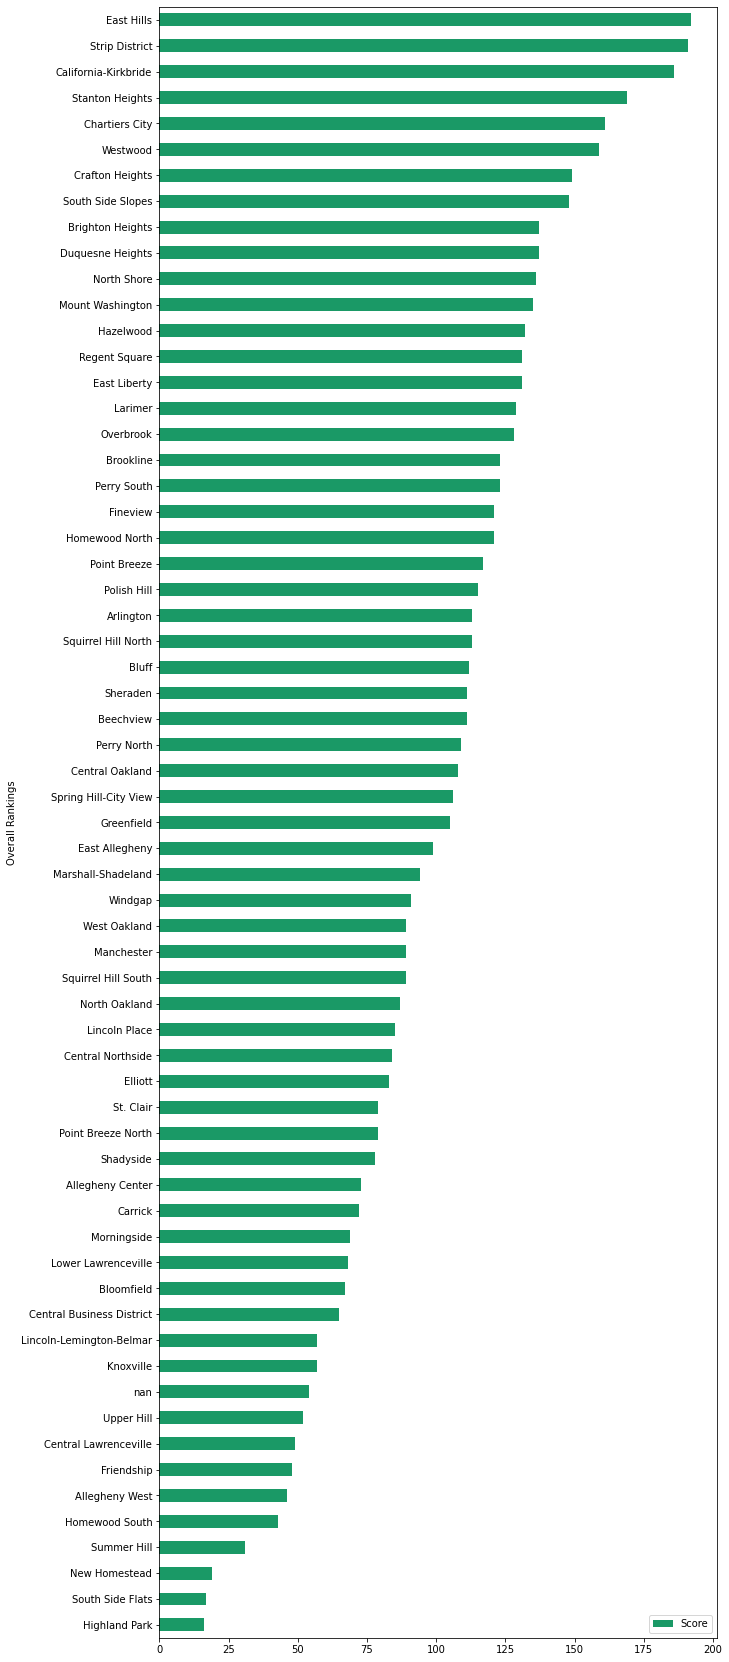

In [13]:
from matplotlib import pyplot
my_color = (0.1,.6,.4)
overall_ranks_df.plot(kind="barh", x='neighborhood', y='Score', figsize=(10,30), color=my_color)
pyplot.ylabel("Overall Rankings")

In [14]:
import geopandas
%matplotlib inline
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# neighborhoods.plot(figsize=(10,10)) # plot the geopandas dataframe
ratio_map = neighborhoods.merge(overall_ranks_df, left_on='hood', right_on='neighborhood')
ratio_map[['hood','Score','geometry']].head()

,hood,Score,geometry
0,Central Oakland,108,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,87,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,89,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Strip District,191,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
4,Central Business District,65,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."


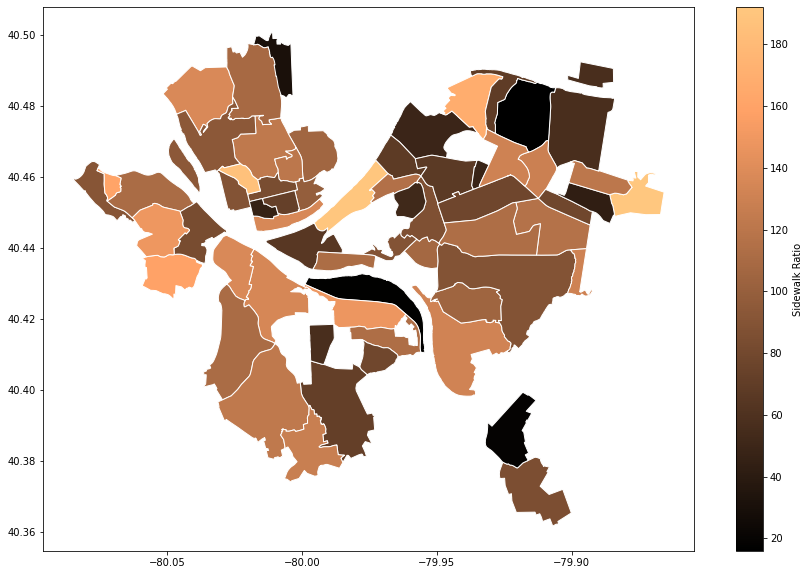

In [15]:
ratio_map.plot(column='Score', # set the data to be used for coloring
               cmap='copper',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Sidewalk Ratio"}, # label the legend
               figsize=(15, 10),         # set the size     
               )

#### Reference Map

<img src="https://tinyurl.com/2p9dbdn4" width="800" height="800"/>

## The Best Neighborhood

Text(0, 0.5, 'Overall Ranking')

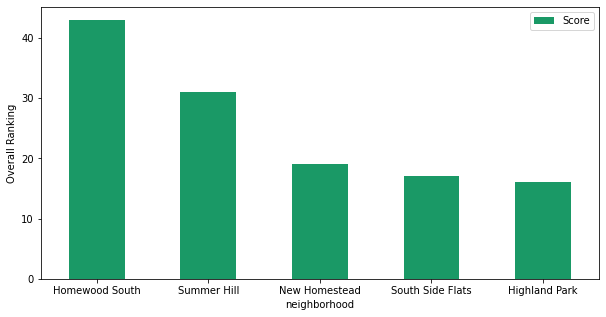

In [16]:
top_5 = overall_ranks_df.head()
top_5 = top_5.sort_values(by="Score", ascending=False)
my_color = (0.1,.6,.4)
top_5.plot(kind="bar", rot=0, x='neighborhood', y='Score', figsize=(10,5), color=my_color)
pyplot.ylabel("Overall Ranking")

Ranking the neighborhoods by the combined metrics and keeping with the lowest score ranks highest, we get <strong>Highland Park</strong> as the best neighborhood in Pittsburgh from a "walkability" perspective. It therefore follows that Highland Park is the best neighborhood in Pittsburgh period, since who cares about other metrics? :)

## Conclusion

### Taha Ahmad
As I mentioned in my individual notebook, I don't know that many Pittsburgh neighborhoods well, so I guess my favorite is the one I currently live in: Shadyside. I have found it to be pretty walkable — it has sidewalks on nearly every street and it doesn't have many long staircases (though it does have a lot of traffic). Shadyside ranked 19/58 overall so it didn't do that badly, but I guess I have a new favorite neighborhood, Highland Park, now that it has been categorically and objectively been proven to be the best neighborhood in Pittsburgh.

In [17]:
overall_ranks_df.loc[overall_ranks_df['neighborhood'] == "Shadyside"]

,neighborhood,Score
18,Shadyside,78
